In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from grouper import group_by_volume, group_by_time
from pyfolio.timeseries import perf_stats
from utils import chart_price, plot, perf, v_backtester, c_backtester, perf_var
import sys
sys.path.append('/home/tomek/ib_tools')
from indicators import get_ATR, get_signals
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
time_int = 30
periods = 100
#multi_periods = [5, 10, 25, 50, 100, 200] 
multi_periods = [5, 10, 20, 40, 80, 160]
roc_periods = [5, 10]
multiplier = 20
bankroll = 15000
vol_lookback = 200
smooth = int(np.ceil(periods/4))
atr_periods = 80

In [3]:
data = pd.DataFrame({'x': np.linspace(-4, 4, 1000)})

In [4]:
def reducer(x):
    if x < -2:
        return max(-(np.log(np.abs(x) -2) - .5), 0)
    elif x > 2:
        return min((np.log(np.abs(x) -2) - .5), 0)
    else:
        return - x**3

In [5]:
#%%timeit
d1 = pd.DataFrame(data.x)
d1['r'] = d1.x.apply(reducer)
out = d1.set_index('x')

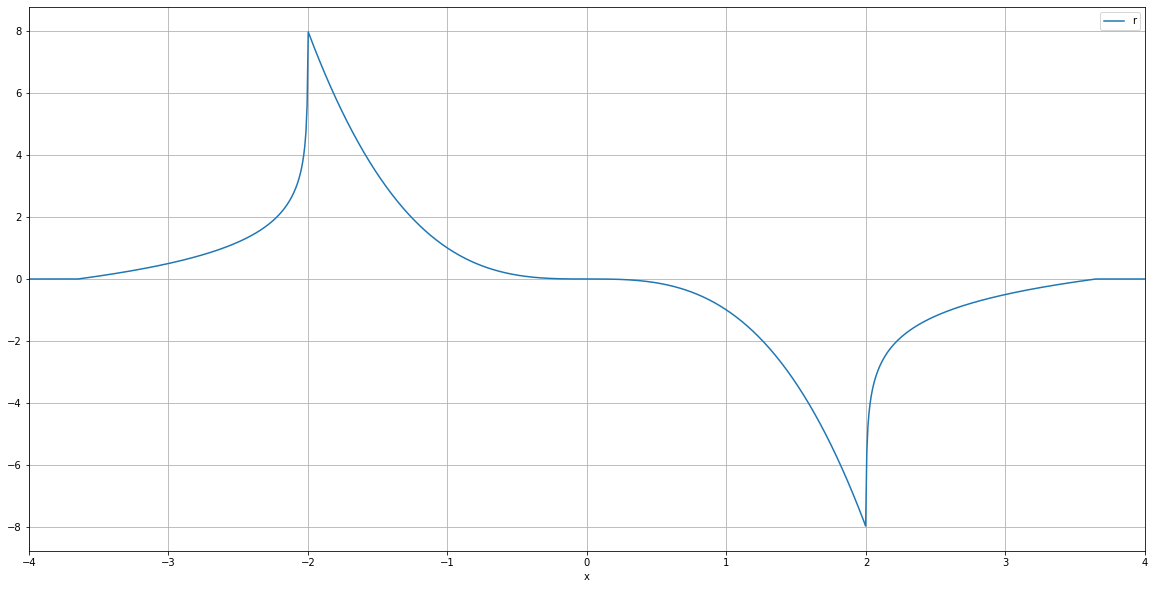

In [6]:
out.plot(figsize=(20,10), grid=True);

In [7]:
#%%timeit
d = pd.DataFrame(data.x)
d['x3'] = -data.x ** 3
d['log'] = (np.log(np.abs(d.x) -2) - .5)
d['-log'] = -(np.log(np.abs(d.x) -2) - .5)
a = d[d['x'] > 2].set_index('x')['log']
b = (d[(d['x']> -2)][d['x'] < 2]).set_index('x')['x3']
c = d[d['x']< -2].set_index('x')['-log']
output = pd.concat([a,b,c]).sort_index()

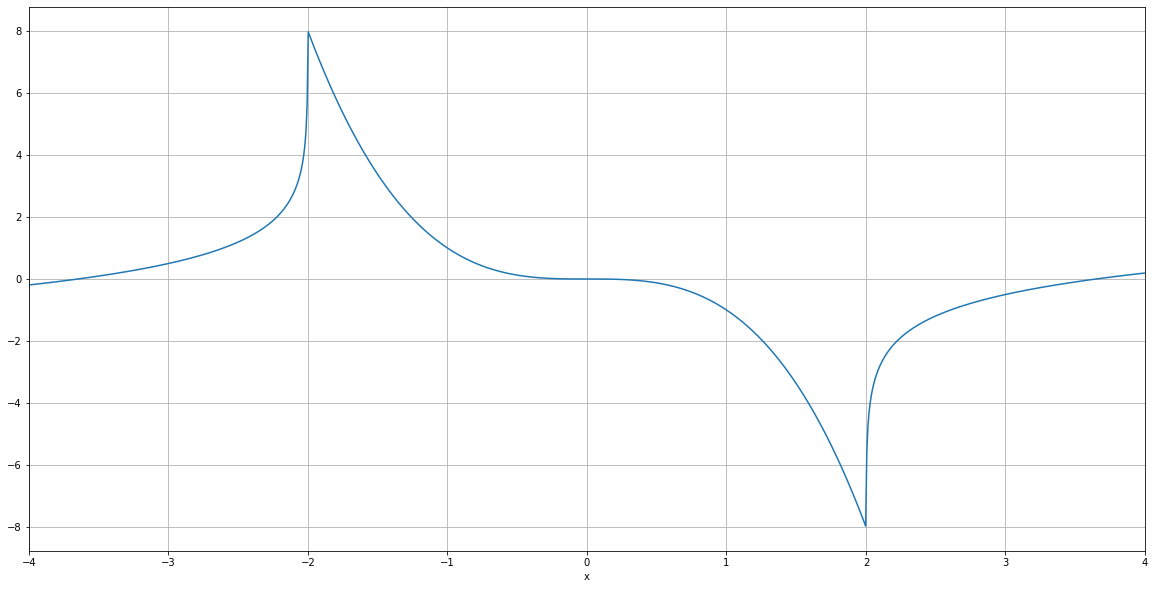

In [8]:
output.plot(figsize=(20,10), grid=True);